# Will it be an early Spring?

On February 2<sup>nd</sup> every year Punxsutawney Phil makes a prediction about if there will be an early Spring or if Winter will continue for 6 more weeks (till about mid-March). He is however not very accurate (well, according to [The Inner Circle](https://www.groundhog.org/inner-circle) he is 100% correct but the human handler may not interpret his response correctly). The overall goal is to be able to predict if it will be an early Spring.

For this project you must go through most steps in the checklist. You must write responses for all items however sometimes the item will simply be "does not apply". Some of the parts are a bit more nebulous and you simply show that you have done things in general (and the order doesn't really matter). Keep your progress and thoughts organized in this document and use formatting as appropriate (using markdown to add headers and sub-headers for each major part). Do not do the final part (launching the product) and your presentation will be done as information written in this document in a dedicated section, no slides or anything like that. It should however include the best summary plots/graphics/data points.

You are intentionally given very little information thus far. You must communicate with your client (me) for additional information as necessary. But also make sure that your communications are efficient, thought out, and not redundant as your client might get frustrated and "fire" you (this only applies to getting information from your client, this does not necessary apply to asking for help with the actual project itself - you should continuously ask questions for getting help).

You must submit all data files and a pickled final model along with this notebook.

The group with the best results on the 10% of the data that I kept for myself will earn +5 extra credit (if multiple groups are close points may be given to multiple groups).

Questions For Client 
====================
- Can you provide more context on how these predictions were made? For example, are these predictions based solely on Punxsutawney Phil, or do they also consider meteorological data?

- How accurate are these predictions historically when compared to actual meteorological outcomes?

- Are there additional datasets you would recommend or provide that could help enhance our analysis, such as meteorological data for each of these years?

- Are there any benchmarks or previous studies on this topic that we should compare our results against?


Questions For Professor 
=======================
- What specific performance metrics are most important for evaluating our predictive model in this case? what we feel is more appropiate , get all trues that you can. 

(test on 10 percent of the data) make a our own test set. 

- Beyond the model and the documentation, are there specific forms of visualizations or types of analysis you expect in our final report?
exploration go through steps 

- Would you recommend any specific statistical tests or analytical methods to understand the impact of various factors on Phil's predictions?
el nino la nina 

- Do you have any preferred data sources? Or are there constraints around data collection?

- About how many years of historical data should we analyze to make these predictions?
Peredicting for this year make it reusable for future. 

- What kind of performance improvements are expected in comparison to Punxsutawney Phil’s historical accuracy?

- Should we focus on any particular region (e.g., Pennsylvania, where Phil makes predictions), or should we generalize for wider use?





## Project Notes

- **Climatic Phenomena Investigation**
  - Research and incorporate data on La Niña or El Niño, as these climatic events may impact the likelihood of an early spring.

- **New Crop Development**
  - Investigate the potential for growing a new type of corn in harsher climates.
  - Assess the feasibility of achieving two harvests in one year if an early spring occurs, potentially doubling productivity.

- **Economic Decision Making**
  - Utilize the predictive model to determine the advisability of purchasing seeds early, based on the likelihood of an early spring. This decision impacts potential double profit or the risk of financial loss.

- **Model Reusability**
  - Design the model to be adaptable for use in future years to ensure its continued relevance and utility.

## Data Insights and Requirements

- **Historical Data Analysis**
  - Review indicates that 50% of the data suggests an early spring, correlating with a 65% increase in profits over regular years.

- **Weather Data Collection**
  - Use weather data collected by the intern, focusing on specific early spring indicators:
    - An early spring is indicated by a 5-day period where:
      - **Average Air Temperature:** Above 40°F.
      - **Minimum Air Temperature:** Above 32°F.
      - **Average Soil Temperature:** Above 50°F.
      - This period must occur on or before April 1st.
      - **Snow Condition:** No snow on the ground throughout this 5-day period.

## Operational Constraints

- **Seed Purchase Deadline**
  - Seeds must be purchased by February 25th to prepare for a potential early planting season, based on the model’s predictions.

## Testing and Validation

- **Test Set Creation**
  - Set aside 10% of the data to create a test set, ensuring that the model's accuracy is evaluated against unseen data.

## Historical Data Context

- **Additional Parameters for Analysis**
  - Include historical data on air temperatures and rainfall over the last 77 years to enhance model training and predictive accuracy.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import *
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

## Frame the Problem and Look at the Big Picture

1. **Define the objective in business terms:**  
   <mark>Investigate the potential for growing a new type of corn in harsher climates. This aims to lead to more reliable planning for businesses and individuals affected by seasonal changes (e.g., agriculture, retail, event planning), potentially increasing profits by 60 percent if predicted correctly.</mark>

2. **How will your solution be used?**  
   <mark>The solution would likely be used by the client as a tool to understand when to plant this new corn.</mark>

3. **How should you frame this problem?**  
   <mark>As a binary classification problem where the goal is to predict one of two possible outcomes: early Spring or continued Winter.</mark>

4. **How should performance be measured? Is the performance measure aligned with the business objective?**  
   <mark>Performance should be measured using accuracy, precision, recall, and F1-score for the binary classification model. Accuracy gives a general sense of how well the model is performing, but precision and recall help understand the balance between predicting early Spring and extended Winter. If one class is more frequent than the other, focusing only on accuracy might lead to skewed results.</mark>

5. **What would be the minimum performance needed to reach the business objective?**  
   <mark>A minimum acceptable performance level might be set around 60% accuracy, which would represent a significant improvement. However, achieving an accuracy closer to 70-80% would provide more confidence and a stronger business case for users to adopt the model.</mark>

6. **What are comparable problems? Can you reuse (personal or readily available) experience or tools?**  
   <mark>Weather forecasting models that predict seasonal shifts based on historical data and meteorological patterns. Existing tools that can be reused include Python libraries such as scikit-learn for machine learning, pandas for data analysis, and matplotlib/seaborn for visualization.</mark>

7. **Is human expertise available?**  
   <mark>Yes, the client who is an experienced farmer.</mark>

8. **How would you solve the problem manually?**  
   <mark>This is essentially an almanac, which has already been done. The manual process would involve: Collecting historical weather data and Punxsutawney Phil’s past predictions, identifying the key variables that might influence the seasonal shift, analyzing the patterns in the data, and making our own predictions based on the observed trends.</mark>

9. **List the assumptions you (or others) have made so far. Verify assumptions if possible.**  
   <mark>.</mark>

  


Get the Data
============
1. List the data you need and how much you need
- El Nino la nina data set 
- Punxsutawney Phil (dataset already given to us )




2.  Find and document where you can get that data
- https://www.kaggle.com/datasets/shabanamir/enso-data


3. Get access authorizations
- None needed all the data is publicly available 

4. Create a workspace: 
- This notebook 

5.  **Get the data**: 
    - Download the provided subset of the data from Kaggle.com and load datset already given to us 

6. **Convert the data to a format you can easily manipulate**:
   - Provided in CSV files so easy to use.

7. **Ensure sensitive information is deleted or protected**:
- Public data already has been anonymized.

8. **Check the size and type of data (time series, geographical, …)**

    1. 
        <mark>- In the enso dataset their are 22 features. There are 882 rows and 22 columns. All the colums are numerical except Season (2-Month), Season (3-Month) and ENSO Phase-Intensity. <mark>
    
    2. Is it a time series?
        <mark>- This is not time series data.<mark>
    
    3. Are any of the features unusable for the business problem?
        <mark>- None of the features seem entirely unusable for the business problem.<mark>

    4. Which feature(s) will be used as the target/label for the business problem? (including which are required to derive the correct label)
        <mark>- The target variable would likely be the prediction of an early spring or continued winter.<mark>

    5. Should any of the features be stratified during the train/test split to avoid sampling biases?
       <mark>- Stratification should focus on Phil’s prediction outcomes. This ensures that both classes (accurate and inaccurate predictions) are evenly represented in the train and test splits. Stratifying by this feature avoids bias in the model’s performance, especially if one class is significantly underrepresented. There are 56 False predictions and 14 True. This indicates a significant class imbalance, with roughly 80% of the predictions being False and only 20% being True. This will help prevent the model from being biased toward predicting the majority class (False).<mark>

In [2]:
def load_data(weather_filename="weather.csv", soil_filename="soil.csv", phil_pred_filename="phil_pred.csv", early_spring_filename="early_spring.csv", enso_filename="Pivoted_ENSO_Dataset.csv"):
    """
    Load all the data and join it together. The data will be pivoted so that the year is the row index.
    The years will be the same as the years in the data file provided.
    """
    
    # Load the basic data
    weather = pd.read_csv(weather_filename, parse_dates=[0], na_values=['M','T'])
    soil = pd.read_csv(soil_filename, parse_dates=[0])
    phil_pred = pd.read_csv(phil_pred_filename)
    early_spring = pd.read_csv(early_spring_filename)
    basic_data = (
        pivot(weather, 'date').
        join(pivot(soil, 'date')).
        join(phil_pred.set_index('year')).
        join(early_spring.set_index('year'))
    )

    # Load the additional data
    # TODO: load any other data, pivot, and join until it is all setup and has the row index as the years
    
    data = pd.read_csv(enso_filename, index_col='year')

    # Align the years by keeping only the years that exist in both datasets
    common_years = basic_data.index.intersection(data.index)   

    # Provide a warning if there are any missing years
    missing_years = set(basic_data.index) - set(data.index)
    if missing_years:
        print(f"Warning: These years are in basic_data but not in enso_data: {missing_years}")


    # Final join, ensuring only common years are used
    final_data = data.loc[common_years].join(basic_data.loc[common_years])
    

    # Write the merged dataset to a CSV file
    final_data.to_csv('Merged_Data.csv')

    return final_data

def pivot(data, date_col, pivot_value='day_of_year'):
    """
    Pivot the data using the given date column. By default, the pivot value is the day of the year
    but this can be changed to other values, such as the month or the week of the year.
    """
    data['year'] = data[date_col].dt.year
    data[pivot_value] = getattr(data[date_col].dt, pivot_value)
    data = data.drop(columns=[date_col]).pivot(index=['year'], columns=[pivot_value])
    data.columns = ["_".join(str(x) for x in a) for a in data.columns.to_flat_index()]  # from https://stackoverflow.com/questions/14507794/pandas-how-to-flatten-a-hierarchical-index-in-columns
    return data













In [3]:
merged_data = load_data()
merged_data.head()

,Global Temperature Anomalies(APR),Global Temperature Anomalies(AUG),Global Temperature Anomalies(DEC),Global Temperature Anomalies(FEB),Global Temperature Anomalies(JAN),Global Temperature Anomalies(JUL),Global Temperature Anomalies(JUN),Global Temperature Anomalies(MAR),Global Temperature Anomalies(MAY),Global Temperature Anomalies(NOV),...,max_soil_moisture_49,max_soil_moisture_50,max_soil_moisture_51,max_soil_moisture_52,max_soil_moisture_53,max_soil_moisture_54,max_soil_moisture_55,max_soil_moisture_56,prediction,early_spring
year,,,,,,,,,,,,,,,,,,,,,
1950,-0.16,-0.09,-0.12,-0.26,-0.20,-0.09,-0.02,-0.08,-0.02,-0.25,...,0.476,0.474,0.469,0.466,0.518,0.495,0.480,0.478,True,False
1951,-0.09,0.11,0.21,-0.37,-0.31,0.10,0.03,-0.16,0.04,0.03,...,0.505,0.519,0.506,0.519,0.493,0.477,0.469,0.463,False,False
1952,0.07,0.06,0.05,0.11,0.14,0.07,0.05,-0.03,0.08,-0.08,...,0.487,0.477,0.512,0.511,0.486,0.483,0.479,0.478,False,True
1953,0.26,0.10,0.07,0.15,0.07,0.08,0.21,0.14,0.20,0.04,...,0.473,0.494,0.520,0.519,0.480,0.474,0.471,0.465,False,True
1954,-0.08,-0.05,-0.12,-0.06,-0.20,-0.09,-0.06,-0.14,-0.12,0.09,...,0.462,0.464,0.467,0.517,0.485,0.474,0.515,0.495,False,False


In [4]:

def drop_columns(input_file, output_file):
    """
    This function drops the specified columns related to 'TNI' and 'PNA' from the input CSV file
    and saves the cleaned dataset to the output file.

    Parameters:
    input_file (str): Path to the input CSV file.
    output_file (str): Path to save the cleaned dataset CSV file.
    """
    # Load the dataset
    data = pd.read_csv(input_file)

    # Columns to drop
    columns_to_drop = [
        'TNI(APR)', 'TNI(AUG)', 'TNI(DEC)', 'TNI(FEB)', 'TNI(JAN)', 'TNI(JUL)', 'TNI(JUN)', 'TNI(MAR)', 'TNI(MAY)', 'TNI(NOV)', 'TNI(OCT)', 'TNI(SEP)',
        'PNA(APR)', 'PNA(AUG)', 'PNA(DEC)', 'PNA(FEB)', 'PNA(JAN)', 'PNA(JUL)', 'PNA(JUN)', 'PNA(MAR)', 'PNA(MAY)', 'PNA(NOV)', 'PNA(OCT)', 'PNA(SEP)'
    ]

    # Drop the specified columns
    cleaned_data = data.drop(columns=columns_to_drop)

    # Save the cleaned dataset to the specified output file
    cleaned_data.to_csv(output_file, index=False)

def split_data(input_file):
    """
    This function splits the final merged dataset into training and testing sets.
    The function returns the training and testing sets as pandas DataFrames.
    """
    # Load the final merged dataset
    merged_data = pd.read_csv(input_file)  # Corrected to lowercase 'merged_data'
    
    # Define features and target
    X = merged_data.drop(columns=['early_spring'])  # Features (everything except 'early_spring')
    y = merged_data['early_spring']  # Target (early_spring)

    # Split the dataset into training and testing sets, with stratification on the target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

    # Recombine X and y for train and test sets
    train = pd.concat([X_train, y_train], axis=1)
    test = pd.concat([X_test, y_test], axis=1)

    return train, test
    

    






In [5]:
drop_columns('Merged_Data.csv', 'PD_MergeData.csv')
train, test = split_data('PD_MergeData.csv')

In [6]:
PDMergedData = pd.read_csv('PD_MergeData.csv')

In [26]:
import pandas as pd
import numpy as np

# Load your existing dataset
df = pd.read_csv("PD_MergeData.csv")

# Calculate means for each numeric column except 'year' and create a dictionary for the new row
new_data = {}
for col in df.columns:
    if df[col].dtype in ['float64', 'int64'] and col != 'year':
        new_data[col] = round(df[col].mean(), 2)  # Rounds to two decimal places
    elif col == 'year':
        new_data[col] = 2024
    elif df[col].dtype == 'object':
        new_data[col] = df[col].mode()[0]
    elif df[col].dtype == 'bool':
        new_data[col] = df[col].mode()[0]

# Convert the dictionary to a DataFrame
new_row = pd.DataFrame(new_data, index=[0])

# Append the new row to the DataFrame
df = pd.concat([df, new_row], ignore_index=True)

# Save the updated DataFrame to a new CSV file to preserve the original data
df.to_csv("PD_MergeData_Updated_with_2024_rounded.csv", index=False)





In [7]:
PDMergedData.shape

(66, 831)

In [8]:
PDMergedData.describe()

,year,Global Temperature Anomalies(APR),Global Temperature Anomalies(AUG),Global Temperature Anomalies(DEC),Global Temperature Anomalies(FEB),Global Temperature Anomalies(JAN),Global Temperature Anomalies(JUL),Global Temperature Anomalies(JUN),Global Temperature Anomalies(MAR),Global Temperature Anomalies(MAY),...,max_soil_moisture_47,max_soil_moisture_48,max_soil_moisture_49,max_soil_moisture_50,max_soil_moisture_51,max_soil_moisture_52,max_soil_moisture_53,max_soil_moisture_54,max_soil_moisture_55,max_soil_moisture_56
count,66.000000,66.000000,65.000000,65.000000,66.000000,66.000000,65.000000,66.000000,66.000000,66.000000,...,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000
mean,1986.969697,0.355758,0.326308,0.343538,0.351970,0.344545,0.318154,0.341212,0.386970,0.343939,...,0.484682,0.486833,0.485197,0.486303,0.485303,0.489273,0.490455,0.487258,0.486348,0.483712
std,21.701450,0.360248,0.311095,0.332540,0.391302,0.365501,0.298637,0.312398,0.405091,0.331448,...,0.023871,0.023315,0.022481,0.023350,0.023279,0.022358,0.021962,0.022143,0.022391,0.021362
min,1950.000000,-0.250000,-0.190000,-0.270000,-0.370000,-0.310000,-0.120000,-0.160000,-0.290000,-0.260000,...,0.448000,0.448000,0.447000,0.447000,0.446000,0.446000,0.439000,0.440000,0.448000,0.440000
25%,1969.500000,0.077500,0.080000,0.060000,0.072500,0.070000,0.070000,0.072500,0.085000,0.065000,...,0.467250,0.468000,0.469000,0.468250,0.467000,0.471500,0.476000,0.473000,0.469250,0.469250
50%,1986.500000,0.300000,0.260000,0.320000,0.380000,0.295000,0.270000,0.290000,0.350000,0.315000,...,0.478000,0.485000,0.480500,0.478000,0.482500,0.487000,0.488000,0.486000,0.480000,0.479000
75%,2005.750000,0.610000,0.590000,0.570000,0.620000,0.617500,0.590000,0.615000,0.670000,0.635000,...,0.508500,0.510000,0.505000,0.513000,0.506750,0.511750,0.516500,0.511250,0.509000,0.494750
max,2023.000000,1.140000,0.960000,1.130000,1.330000,1.220000,0.910000,1.050000,1.340000,0.990000,...,0.520000,0.520000,0.520000,0.520000,0.520000,0.520000,0.520000,0.520000,0.520000,0.520000


In [9]:
PDMergedData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Columns: 831 entries, year to early_spring
dtypes: bool(2), float64(828), int64(1)
memory usage: 427.7 KB


Explore the Data
================


1. Copy the data for exploration, downsampling to a manageable size if necessary.

2. Study each attribute and its characteristics: Name; Type (categorical, numerical, bounded, text, structured, ...); % of missing values; Noisiness and type of noise (stochastic, outliers, rounding errors, ...); Usefulness for the task; Type of distribution (Gaussian, uniform, logarithmic, ...)

3. For supervised learning tasks, identify the target attribute(s)

4. Visualize the data

5. Study the correlations between attributes

Study how you would solve the problem manually

6. Identify the promising transformations you may want to apply

7. Identify extra data that would be useful (go back to “Get the Data”)


In [10]:
df_weather = pd.read_csv('weather.csv')
df_soil = pd.read_csv('soil.csv')

In [11]:
df_weather["min_temp"].value_counts()

min_temp
28.0     139
25.0     138
21.0     137
22.0     129
24.0     129
        ... 
-21.0      3
-20.0      2
-24.0      2
-26.0      1
55.0       1
Name: count, Length: 76, dtype: int64

In [12]:
df_weather["avg_temp"].value_counts()

avg_temp
30.0     89
26.5     87
29.5     82
34.0     80
33.0     78
         ..
-10.0     1
-6.5      1
-3.5      1
-7.0      1
60.5      1
Name: count, Length: 139, dtype: int64

In [13]:
df_weather["snowdepth"].value_counts()

snowdepth
0.0     1266
T        679
1.0      448
2.0      349
3.0      224
4.0      204
5.0      134
6.0      118
8.0       74
7.0       67
M         62
9.0       47
10.0      41
12.0      31
11.0      28
18.0      17
14.0      16
15.0      15
20.0      14
16.0      12
13.0      10
22.0       9
17.0       9
19.0       9
21.0       8
24.0       6
23.0       5
25.0       4
26.0       4
28.0       3
33.0       3
30.0       2
32.0       1
31.0       1
Name: count, dtype: int64

In [14]:
df_weather["snowfall"].value_counts()

snowfall
0.0     2101
T        666
1.0      223
0.5      206
2.0      105
        ... 
7.5        1
4.1        1
12.0       1
3.7        1
4.4        1
Name: count, Length: 69, dtype: int64

In [15]:
df_weather["precipitation"].value_counts()

precipitation
0.0     1303
T        627
0.02     193
0.03     138
0.01     137
        ... 
0.89       1
1.2        1
2.05       1
1.7        1
1.65       1
Name: count, Length: 135, dtype: int64

<Axes: >

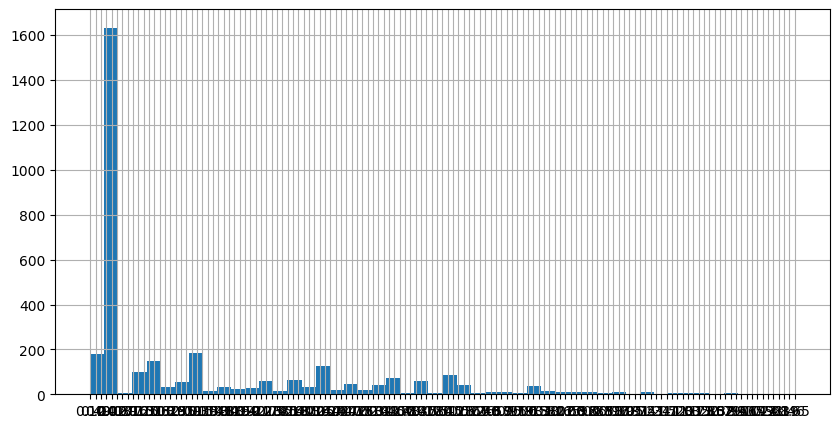

In [28]:
df_weather["precipitation"].hist(bins=50, figsize=(10,5))    

avg_temp     object
min_temp     object
max_temp     object
snowdepth    object
snowfall     object
dtype: object


array([[<Axes: title={'center': 'avg_temp'}>,
        <Axes: title={'center': 'min_temp'}>],
       [<Axes: title={'center': 'max_temp'}>,
        <Axes: title={'center': 'snowdepth'}>],
       [<Axes: title={'center': 'snowfall'}>, <Axes: >]], dtype=object)

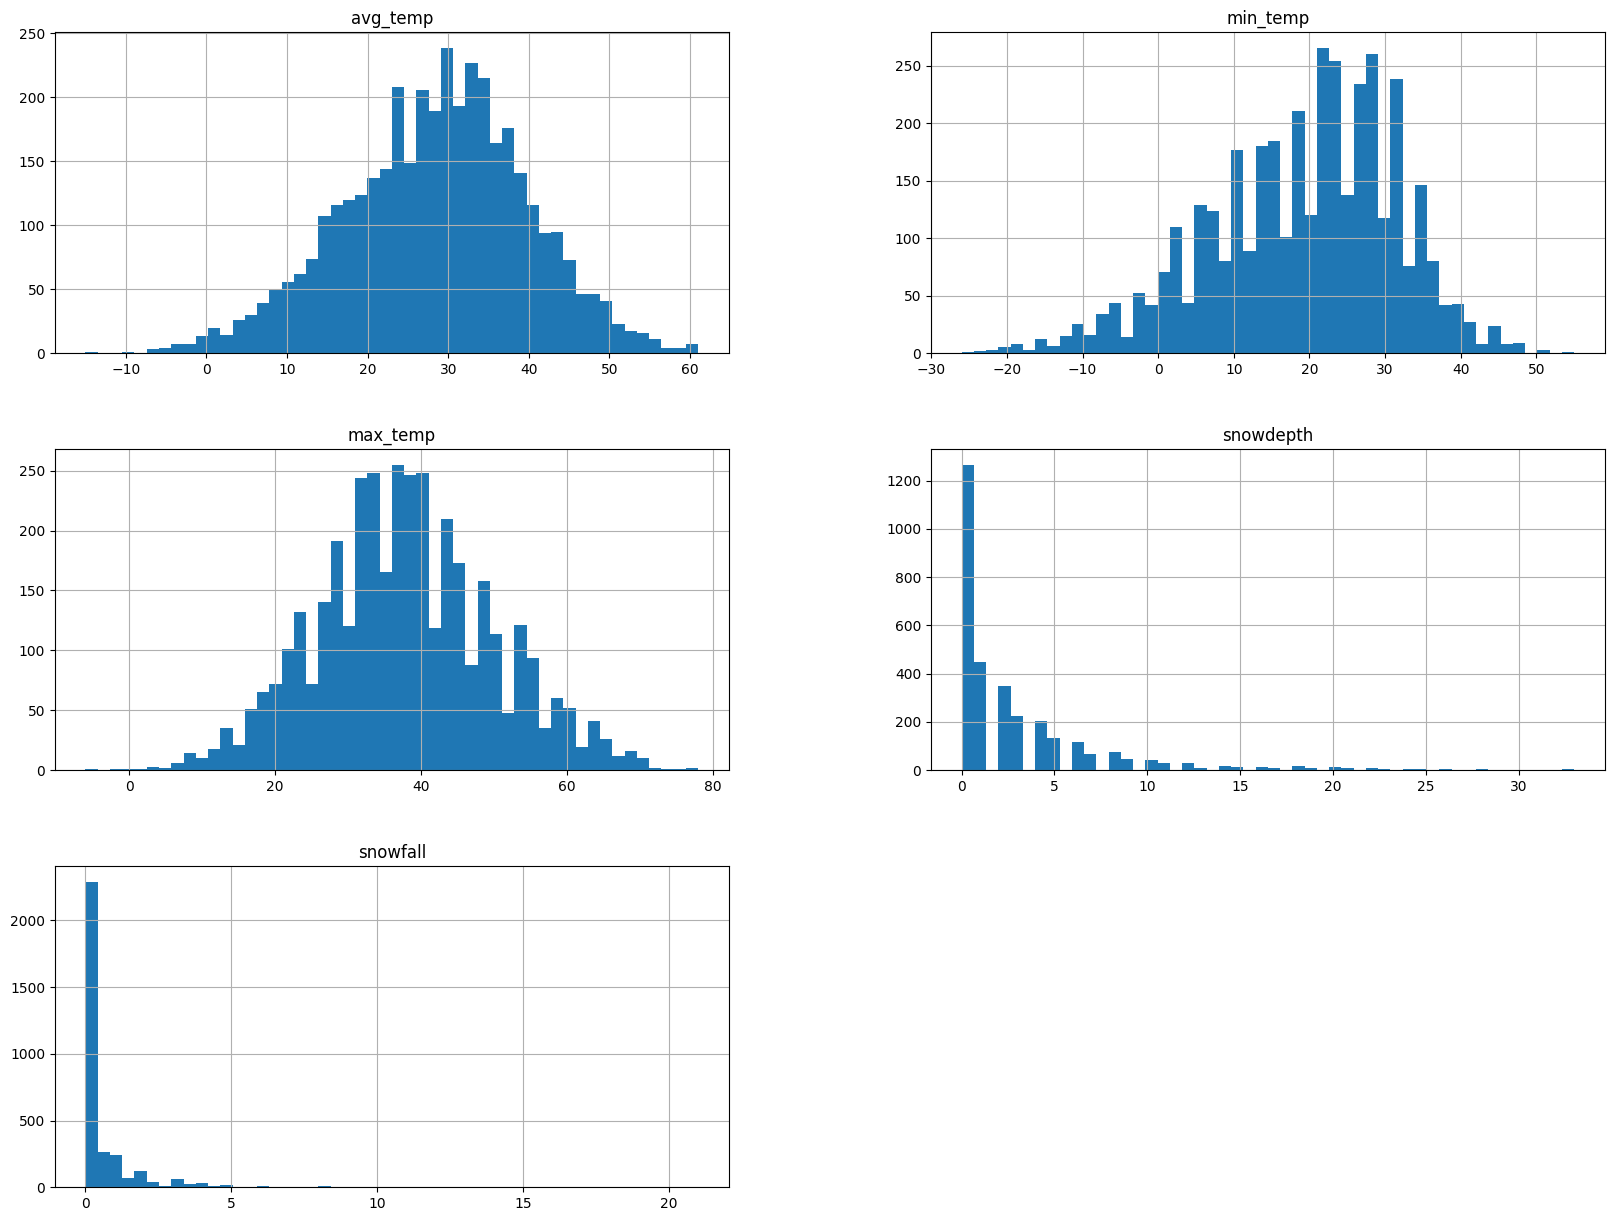

In [17]:
# Check data types of the columns
print(df_weather[["avg_temp", "min_temp", "max_temp", "snowdepth", "snowfall"]].dtypes)

# Replace 'T' and 'M' with NaN, assuming these are typical non-numeric entries in weather data
df_weather.replace({'T': None, 'M': None}, inplace=True)

# Convert columns to numeric, coercing errors will turn non-convertible values into NaN
df_weather[["avg_temp", "min_temp", "max_temp", "snowdepth", "snowfall"]] = df_weather[["avg_temp", "min_temp", "max_temp", "snowdepth", "snowfall"]].apply(pd.to_numeric, errors='coerce')

# Now try plotting again
df_weather[["avg_temp", "min_temp", "max_temp", "snowdepth", "snowfall"]].hist(bins=50, figsize=(20,15))


array([[<Axes: title={'center': 'mean_soil_temp'}>,
        <Axes: title={'center': 'mean_soil_moisture'}>],
       [<Axes: title={'center': 'min_soil_temp'}>,
        <Axes: title={'center': 'min_soil_moisture'}>],
       [<Axes: title={'center': 'max_soil_temp'}>,
        <Axes: title={'center': 'max_soil_moisture'}>]], dtype=object)

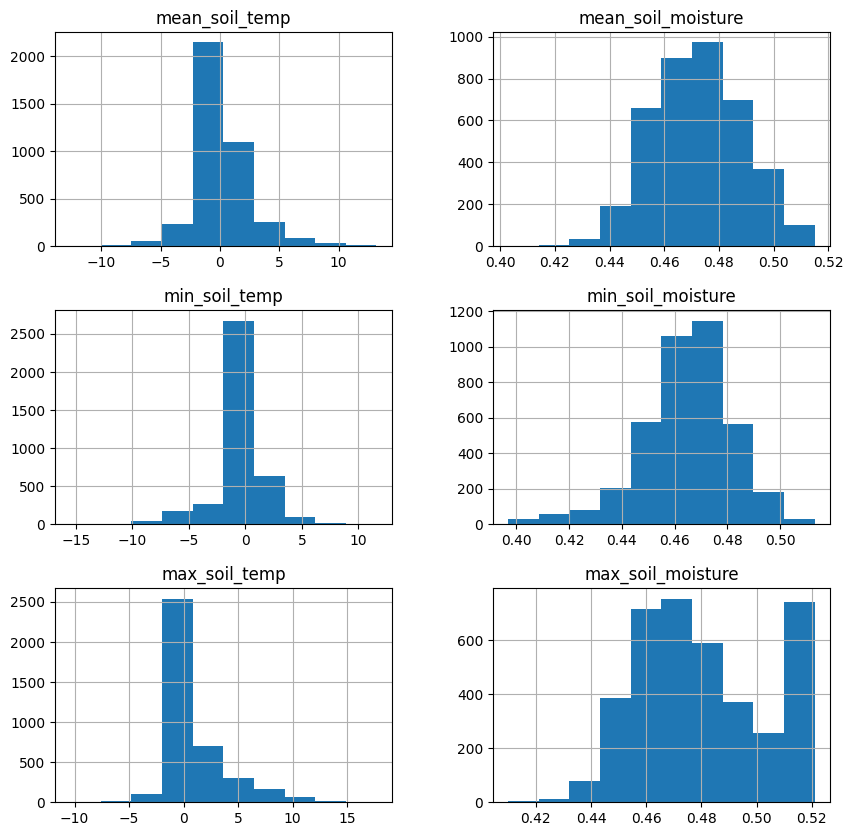

In [ ]:
df_soil.hist(figsize=(10,10))

In [ ]:
PDMergedData["prediction"].value_counts()

prediction
False    53
True     13
Name: count, dtype: int64

In [ ]:
df = PDMergedData.copy() # to avoid changing the original data 


| Names                         | Type                                                                     | Noise | Distribution                              |
|------------------------------|--------------------------------------------------------------------------|-------|-------------------------------------------|
| Date                         | Datetime                                                                 |   no noise    |                                           |
| Year                         | Numerical                                                                |       | regular                                          |
| Month                        | String                                                                   |  no noise     | Jan 8%,  Feb 8%,  Other (734) 83%           |
| Global Temperature Anomalies | Numerical                                                                |       |                                           |
| Nino 1+2 SST                 | Numerical, Sea Surface Temperature in °C                                 | missing values      |          regular                                 |
| Nino 1+2 SST Anomalies       | Sea Surface Temperature Anomalies, Numerical                              missing values   |             regular                              |
| Nino 3 SST                   | Numerical, 3 region Sea Surface Tempurature °C                           |  missing values        | regualr                                          |
| Nino 3 SST Anomalies         | Numerical, Nino 3 region Sea Surface Temperature Anomalies (°C)          |  missing values        | regular                                          |
| Nino 3.4 SST                 | Numerical, Nino 3.4 region Sea Surface Temperature (°C)                  |   missing values       |       regular                                    |
| Nino 3.4 SST Anomalies       | Numerical , Nino 3.4 region Sea Surface Temperature Anomalies (°C)       |  missing values        |       regular                                    |
| Nino 4 SST                   | Numerical , NINO 3.4 region Sea Surface Temperature (°C)                 |  missing values        |        regular                                   |
| Nino 4 SST Anomalies         | Numerical, NINO 4 region Sea Surface Temperature Anomalies(°C)           |    missing values      |               regular                            |
| TNI                          | Numerical, Trans-Nino Index                                              |       |                                           |
| PNA                          | Numerical, Pacific-North American Index                                  |       |                                           |
| OLR                          | Numerical, Outgoing Longwave Radiation (W/m2 )                           |       |                                           |
| SOI                          | Numerical, Southern Oscillation Index                                    |       |                                           |
| Season (2month)              | String , two month season, The letters stand for the months of the year  |       | DJ 8%, JF 8%, other (734) 83%               |
| MEI.v2                       | Numerical, Multivariate ENSO Index Version 2                             |       |                                           |
| Season (3month)              | String , three month season e.g DJF (Months of the Year)                 |       | DJF 8%, JFM 8%, other(734) 83%              |
| ONI                          | Numerical , Oceanic Nino index (°C)                                      |       |                                           |
| Season (12month)             | twelve month season e.g 1950–1951                                        |       | 1950-1951 1%,  1951-1952 1% ,Other(858) 97% |
| ENSO Phase-Intensity         | String ,yearly ENSO phase & intensity e.g SL (strong La Nina)            |       | N 26%, WL 18%, other (498) 56%              |

| Name               | Type       | Noise                                                                                                                                    | Distribution                                                                                        |
|--------------------|------------|------------------------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------|
| Early Spring       | boolean    | None                                                                                                                                     | True 50%, False 50%                                                                                 |
| max_temp           | Numerical  | Missing values for some days and years                                                                                                   |                                                                                                     |
| min_temp           | Numerical  | No noise                                                                                                                                 | majority of the values in min_temp are above 24 degrees , their are some negative values            |
| Percipitation      | Numerical  | Also has 627 values as T                                                                                                                 |                                                                                                     |
| Snowfall           | Numerical  | Has some values that are T 666 of them                                                                                                   |                                                                                                     |
| snowdepth          | Numerical  | Some rows have T and M for values                                                                                                        | Majority of the values the snowdepth is 0.0 , T has 679 values , M has 62 values                    |
| avg_temp           | Numerical  | No noise                                                                                                                                 | 30 degrees average temparature has the most values at 89                                            |
| mean_soil_temp     | Numerical  | No noise                                                                                                                                 | Normal, centered around 0                                                                           |
| mean_soil_moisture | Numerical  | No Noise                                                                                                                                 | Uniform                                                                                             |
| min_soil_temp      | Numerical  | no                                                                                                                                       | normal-like distribution centered around 0 and a slight right skew.                                 |
| min_soil_moisture  | Numerical  | no                                                                                                                                       | normally distributed but has a narrower range compared to mean soil moisture, centered around 0.45. |
| max_soil_temp      | Numerical  | The smooth curve suggests minimal noise                                                                                                  | The distribution is slightly skewed to the right.                                                   |
| max_soil_moisture  | Numerical  | he multiple peaks could be a sign of variability in the data or represent different states of soil moisture that are naturally occurring | Displays a less clear pattern compared to other moisture measures, with multiple peaks              |
| prediction         | Boolean    | No noise                                                                                                                                 | 53 of values are false , 13 of the values are true                                                  |

In [ ]:
df.describe()

,year,Global Temperature Anomalies(APR),Global Temperature Anomalies(AUG),Global Temperature Anomalies(DEC),Global Temperature Anomalies(FEB),Global Temperature Anomalies(JAN),Global Temperature Anomalies(JUL),Global Temperature Anomalies(JUN),Global Temperature Anomalies(MAR),Global Temperature Anomalies(MAY),...,max_soil_moisture_47,max_soil_moisture_48,max_soil_moisture_49,max_soil_moisture_50,max_soil_moisture_51,max_soil_moisture_52,max_soil_moisture_53,max_soil_moisture_54,max_soil_moisture_55,max_soil_moisture_56
count,66.000000,66.000000,65.000000,65.000000,66.000000,66.000000,65.000000,66.000000,66.000000,66.000000,...,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000
mean,1986.969697,0.355758,0.326308,0.343538,0.351970,0.344545,0.318154,0.341212,0.386970,0.343939,...,0.484682,0.486833,0.485197,0.486303,0.485303,0.489273,0.490455,0.487258,0.486348,0.483712
std,21.701450,0.360248,0.311095,0.332540,0.391302,0.365501,0.298637,0.312398,0.405091,0.331448,...,0.023871,0.023315,0.022481,0.023350,0.023279,0.022358,0.021962,0.022143,0.022391,0.021362
min,1950.000000,-0.250000,-0.190000,-0.270000,-0.370000,-0.310000,-0.120000,-0.160000,-0.290000,-0.260000,...,0.448000,0.448000,0.447000,0.447000,0.446000,0.446000,0.439000,0.440000,0.448000,0.440000
25%,1969.500000,0.077500,0.080000,0.060000,0.072500,0.070000,0.070000,0.072500,0.085000,0.065000,...,0.467250,0.468000,0.469000,0.468250,0.467000,0.471500,0.476000,0.473000,0.469250,0.469250
50%,1986.500000,0.300000,0.260000,0.320000,0.380000,0.295000,0.270000,0.290000,0.350000,0.315000,...,0.478000,0.485000,0.480500,0.478000,0.482500,0.487000,0.488000,0.486000,0.480000,0.479000
75%,2005.750000,0.610000,0.590000,0.570000,0.620000,0.617500,0.590000,0.615000,0.670000,0.635000,...,0.508500,0.510000,0.505000,0.513000,0.506750,0.511750,0.516500,0.511250,0.509000,0.494750
max,2023.000000,1.140000,0.960000,1.130000,1.330000,1.220000,0.910000,1.050000,1.340000,0.990000,...,0.520000,0.520000,0.520000,0.520000,0.520000,0.520000,0.520000,0.520000,0.520000,0.520000


In [ ]:
df.info(show_counts=True) # show_counts=True will show the number of non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Columns: 831 entries, year to early_spring
dtypes: bool(2), float64(828), int64(1)
memory usage: 427.7 KB



# What is the target Label?

- The target Label is Early spring 

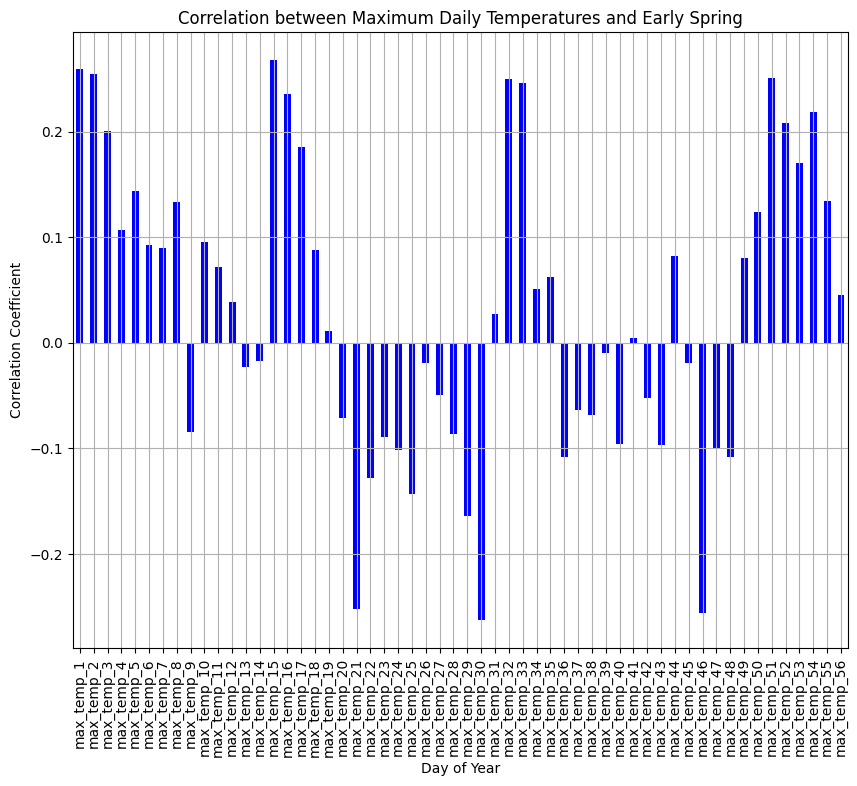

In [ ]:
# Load the merged data
df_corr = pd.read_csv("PD_MergeData.csv")

# Filter columns for max temperatures across days and correlate with Early Spring
max_temp_cols = [col for col in df_corr.columns if 'max_temp' in col]
correlations_max_temp = df_corr[max_temp_cols + ['early_spring']].corr()['early_spring'].drop('early_spring')

# Plot the correlations
plt.figure(figsize=(10, 8))
correlations_max_temp.plot(kind='bar', color='blue')
plt.title('Correlation between Maximum Daily Temperatures and Early Spring')
plt.xlabel('Day of Year')
plt.ylabel('Correlation Coefficient')
plt.grid(True)
plt.show()



- The correlation coefficients vary significantly across different days of the year. Some days show positive correlations, some show negative, 


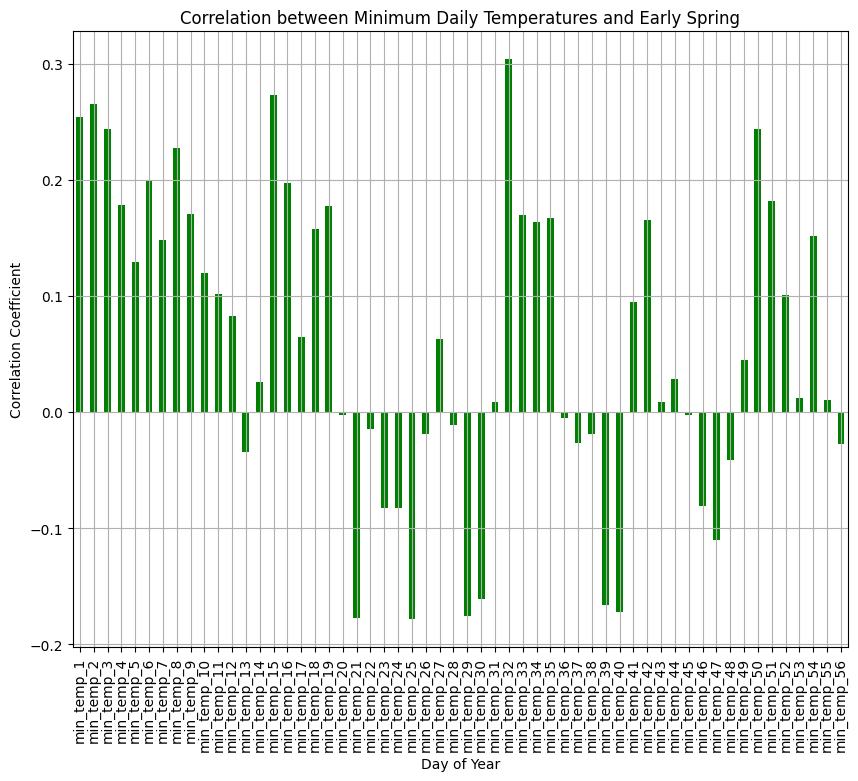

In [ ]:
# Assuming data is already loaded and available as DataFrame 'data'
min_temp_cols = [col for col in df_corr.columns if 'min_temp' in col]
correlations_min_temp = df_corr[min_temp_cols + ['early_spring']].corr()['early_spring'].drop('early_spring')

# Plot the correlations
plt.figure(figsize=(10, 8))
correlations_min_temp.plot(kind='bar', color='green')
plt.title('Correlation between Minimum Daily Temperatures and Early Spring')
plt.xlabel('Day of Year')
plt.ylabel('Correlation Coefficient')
plt.grid(True)
plt.show()


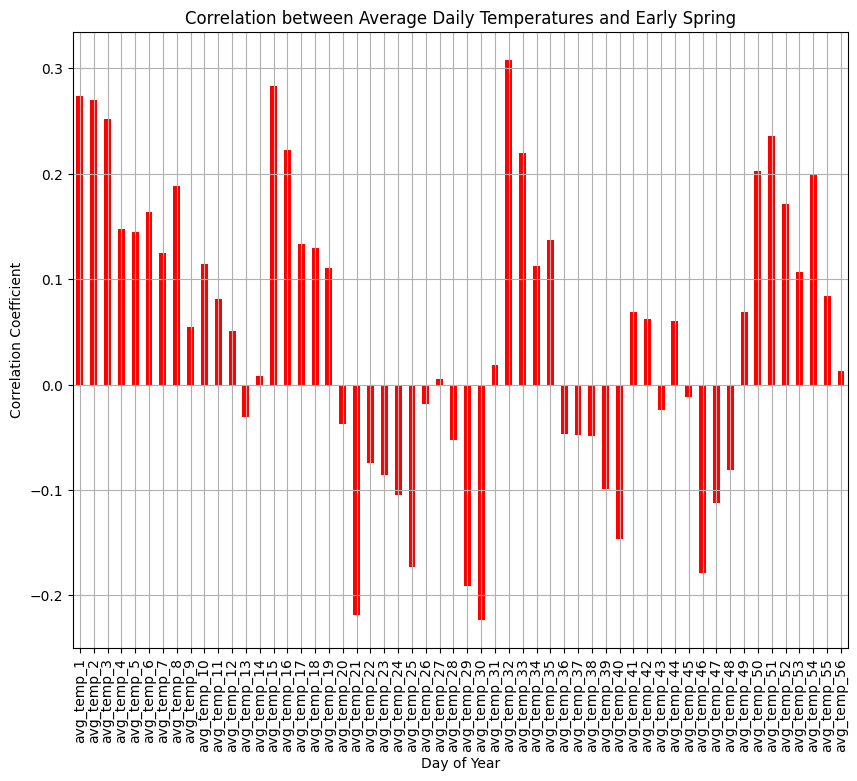

In [ ]:
# Assuming data is already loaded and available as DataFrame 'data'
avg_temp_cols = [col for col in df_corr.columns if 'avg_temp' in col]
correlations_avg_temp = df_corr[avg_temp_cols + ['early_spring']].corr()['early_spring'].drop('early_spring')

# Plot the correlations
plt.figure(figsize=(10, 8))
correlations_avg_temp.plot(kind='bar', color='red')
plt.title('Correlation between Average Daily Temperatures and Early Spring')
plt.xlabel('Day of Year')
plt.ylabel('Correlation Coefficient')
plt.grid(True)
plt.show()


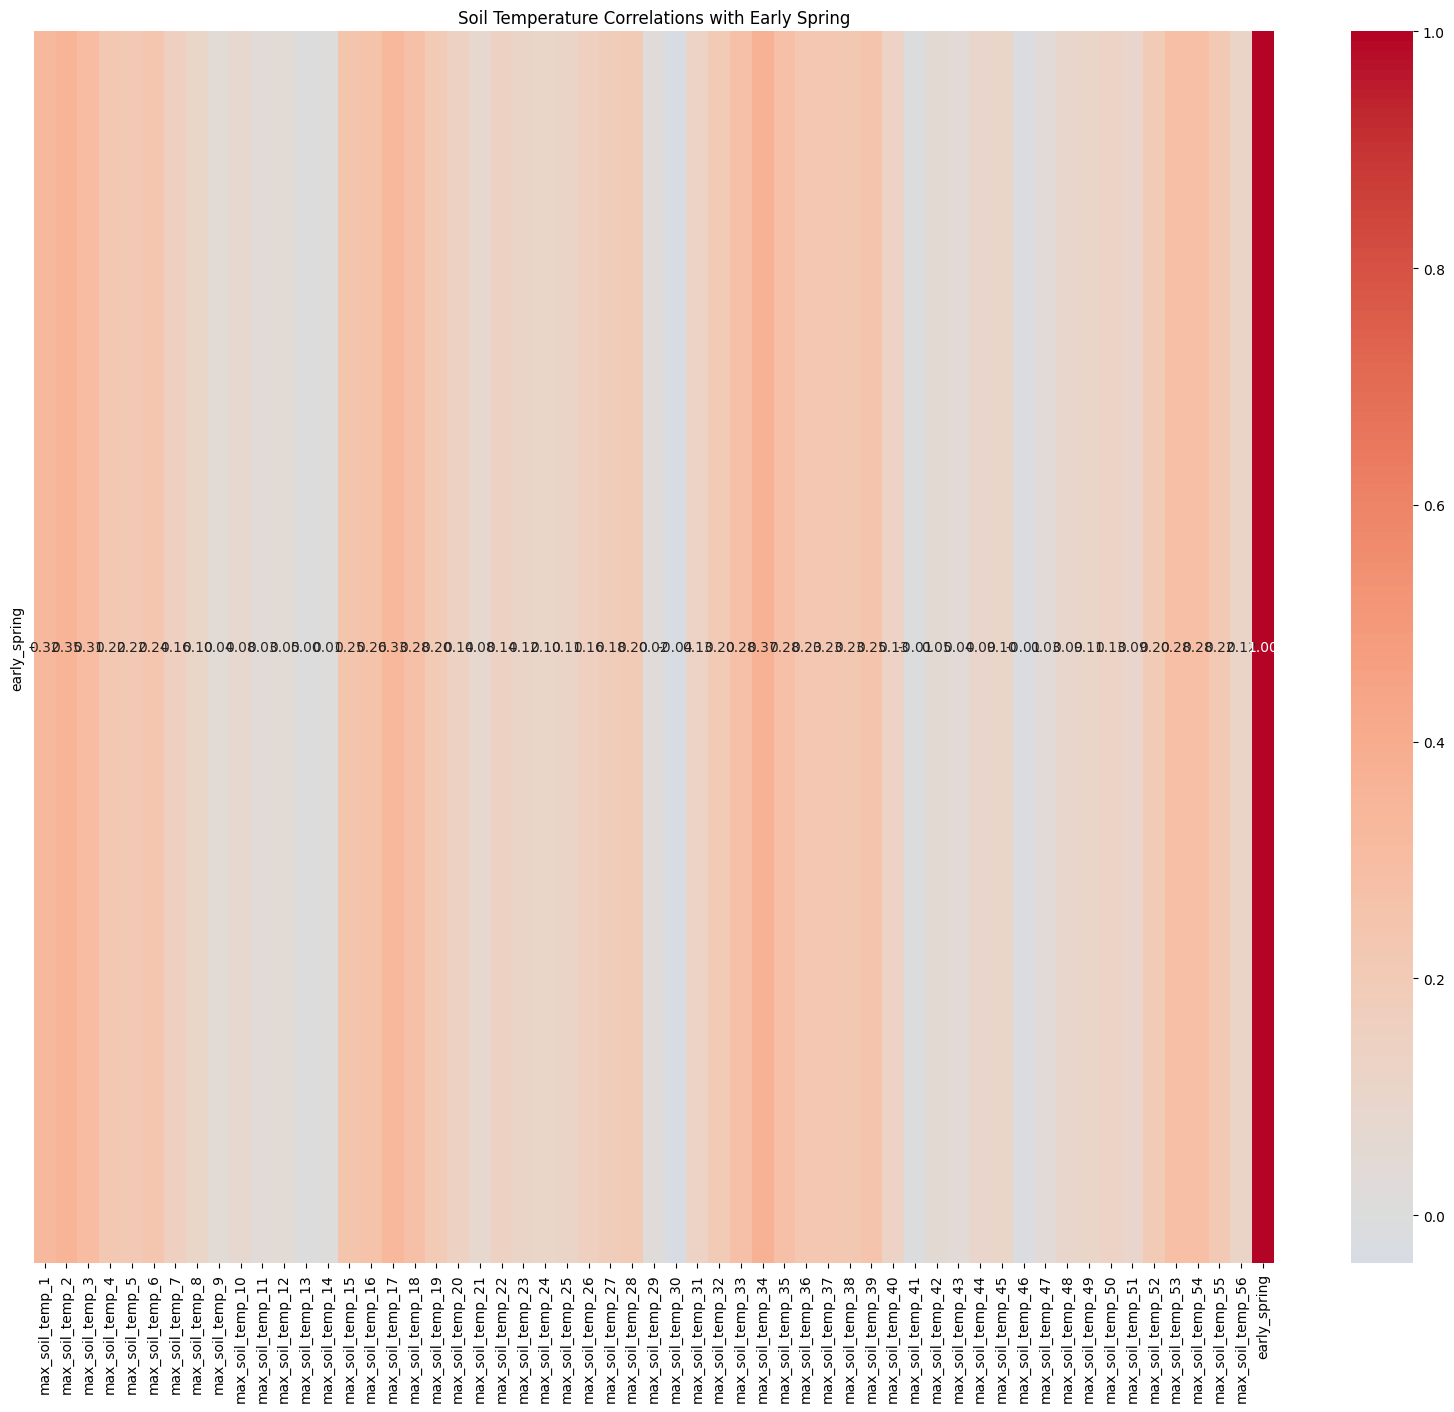

In [ ]:
# Load the dataset
soil_df = pd.read_csv("PD_MergeData.csv")

# Filter columns for each temperature type and calculate their means if needed
# If each day is already its own column, this step might be unnecessary unless you need averaging
for prefix in ['mean_soil_temp', 'min_soil_temp', 'max_soil_temp']:
    # Identify columns for each temperature type
    day_cols = [col for col in soil_df.columns if prefix in col]
    # If the day_cols are structured like 'mean_soil_temp_1', 'mean_soil_temp_2', ..., 'mean_soil_temp_56'
    # Here we assume each day's data is needed as-is for correlation analysis.

# Calculate correlations and generate heatmap
correlation_matrix = soil_df[day_cols + ['early_spring']].corr()

# Create a heatmap with annotations
plt.figure(figsize=(20, 16))
# Focus only on the last row or column if correlating with 'early_spring'
sns.heatmap(correlation_matrix.loc[['early_spring']], annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Soil Temperature Correlations with Early Spring')
plt.show()




In [ ]:

# Assuming soil_df is your DataFrame
soil_df = pd.read_csv("PD_MergeData.csv")

# Replace 'T' and possibly other non-numeric entries with NaN
soil_df = soil_df.replace('T', np.nan).apply(pd.to_numeric, errors='coerce')

# Calculate correlations again
correlation_matrix = soil_df.corr()

# Filter for columns with correlation greater than a threshold, e.g., 0.5
positive_correlations = correlation_matrix[correlation_matrix['early_spring'] > 0.5]['early_spring']

# Print the columns and their corresponding correlation values
print("Columns significantly correlated with Early Spring:")
print(positive_correlations.sort_values(ascending=False))

Columns significantly correlated with Early Spring:
early_spring    1.0
Name: early_spring, dtype: float64


- It looks like the only correlation that's being picked up is the trivial one: early_spring with itself, which is always 1.0. This suggests that none of the other variables in your dataset are showing a significant correlation with the early_spring variable 



In [ ]:
# Using a lower threshold and Spearman correlation method
correlation_matrix = soil_df.corr(method='spearman')  # 'spearman' for non-parametric data
significant_correlations = correlation_matrix[correlation_matrix['early_spring'].abs() > 0.3]['early_spring']  # Lowered threshold to 0.3

print("Significant correlations with Early Spring using Spearman's method:")
print(significant_correlations.sort_values(ascending=False))


Significant correlations with Early Spring using Spearman's method:
early_spring                         1.000000
snowfall_42                          0.469547
mean_soil_temp_34                    0.446195
min_soil_temp_34                     0.443189
max_soil_temp_34                     0.412322
min_soil_temp_32                     0.381986
max_soil_temp_33                     0.366040
min_soil_temp_33                     0.361311
mean_soil_temp_35                    0.350752
mean_soil_temp_33                    0.349161
min_soil_temp_36                     0.348821
precipitation_20                     0.346638
mean_soil_temp_3                     0.345185
max_soil_temp_3                      0.342963
mean_soil_temp_32                    0.342802
mean_soil_temp_36                    0.340420
mean_soil_temp_53                    0.340412
min_soil_temp_35                     0.338419
min_soil_temp_3                      0.331802
mean_soil_temp_38                    0.331674
min_soil_tem

## Positive Correlations

- Soil Temperature: Various soil temperature variables (e.g., mean_soil_temp_34, min_soil_temp_34, max_soil_temp_34) around the 34th day show strong positive correlations. This suggests that higher soil temperatures around this time may be associated with an early onset of spring.

- Snowfall and Precipitation: Certain days' snowfall and precipitation (snowfall_42, precipitation_20) also show moderate positive correlations, indicating that more precipitation or snow during these periods might relate to early spring conditions.

## Negative Correlations:

- Soil Moisture: Variables like max_soil_moisture_29 and mean_soil_moisture_29 are negatively correlated, suggesting that higher soil moisture levels on these days might be inversely related to early spring conditions.

ONI(APR)       0.108724
ONI(AUG)      -0.090680
ONI(DEC)      -0.154253
ONI(FEB)       0.193269
ONI(JAN)       0.196310
ONI(JUL)      -0.027928
ONI(JUN)       0.010390
ONI(MAR)       0.178954
ONI(MAY)       0.045222
ONI(NOV)      -0.180655
ONI(OCT)      -0.189426
ONI(SEP)      -0.146271
MEI.v2(APR)    0.183564
MEI.v2(AUG)   -0.222921
MEI.v2(DEC)   -0.162473
MEI.v2(FEB)    0.254064
MEI.v2(JAN)    0.237286
MEI.v2(JUL)   -0.131523
MEI.v2(JUN)    0.006192
MEI.v2(MAR)    0.201762
MEI.v2(MAY)    0.117995
MEI.v2(NOV)   -0.184538
MEI.v2(OCT)   -0.242060
MEI.v2(SEP)   -0.239376
Name: early_spring, dtype: float64


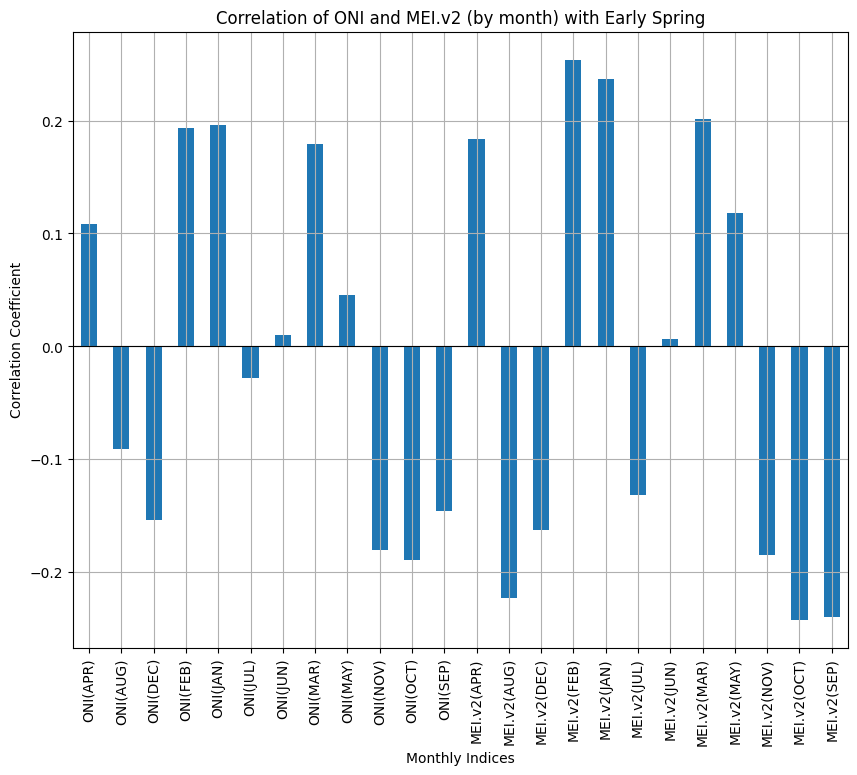

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the data is loaded into a DataFrame called df
Index_corr = pd.read_csv("PD_MergeData.csv")

# Select only the relevant columns for correlation: those containing ONI and MEI.v2 data for each month, and early spring
oni_columns = [col for col in Index_corr.columns if 'ONI' in col]
mei_v2_columns = [col for col in Index_corr.columns if 'MEI.v2' in col]
early_spring_column = ['early_spring']

# Combine the lists to create a new DataFrame that contains only the relevant data
correlation_data = Index_corr[oni_columns + mei_v2_columns + early_spring_column]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Extract the part of the matrix that correlates each index with 'early_spring'
early_spring_correlations = correlation_matrix['early_spring'].drop('early_spring')

# Print the correlation values
print(early_spring_correlations)

# Optional: Plot the correlations to visualize them
plt.figure(figsize=(10, 8))
early_spring_correlations.plot(kind='bar')
plt.title('Correlation of ONI and MEI.v2 (by month) with Early Spring')
plt.xlabel('Monthly Indices')
plt.ylabel('Correlation Coefficient')
plt.grid(True)
plt.axhline(y=0, color='black', linewidth=0.8)
plt.show()


## ONI Correlations
- Positive Correlations in Early Year Months: ONI shows positive correlations in January (0.196), February (0.193), and March (0.179). These months are crucial for early spring predictions, suggesting that higher ONI values (which indicate warmer sea surface temperatures in the central and eastern tropical Pacific Ocean) during these months may be associated with early spring occurrences.

- Negative Correlations in Late Year Months: There are negative correlations from August through October and December, with the strongest negative correlation in October (-0.189). This indicates that higher ONI values in these months could relate to a delayed onset of spring.

## MEI.v2 Correlations

- Strongest Positive Correlation in February: MEI.v2 in February shows the strongest positive correlation (0.254) among all the months, reinforcing the idea that ENSO conditions early in the year are predictive of early spring occurrences.

- Significant Negative Correlations in Late Summer and Fall: From July through October, with particularly strong negative correlations in August (-0.223) and October (-0.242), suggesting that stronger ENSO signals during these months may be associated with delaye spring occurrences.

## Insights
- Early Year ENSO Signals and Early Spring: Both ONI and MEI.v2 show that early year ENSO conditions (positive correlations in Jan, Feb, Mar for ONI and Feb, Mar for MEI.v2) are more indicative of early spring. This could be due to the influence of these indices on winter weather patterns in the northern hemisphere, which might affect the onset of spring conditions.

- Negative Correlations in Late Year: The negative correlations in the later months with both indices suggest that stronger ENSO signals during this period could delay the onset of spring.


In [ ]:
import pandas as pd
import numpy as np

# Load your data
Anomalies_data = pd.read_csv('PD_MergeData.csv')

# Replace 'T' with NaN
Anomalies_data.replace('T', np.nan, inplace=True)

# Convert all columns to numeric, coercing errors to NaN (if any non-numeric values other than 'T' exist)
Anomalies_data = Anomalies_data.apply(pd.to_numeric, errors='coerce')

# Calculate correlation
correlation_matrix = Anomalies_data.corr()

# Extract correlations related to Early Spring
early_spring_correlations = correlation_matrix.loc['early_spring', [
    'Global Temperature Anomalies(JAN)',
    'Global Temperature Anomalies(FEB)',
    'Global Temperature Anomalies(MAR)',
    'Global Temperature Anomalies(APR)',
    'Global Temperature Anomalies(MAY)',
    'Global Temperature Anomalies(JUN)',
    'Global Temperature Anomalies(JUL)',
    'Global Temperature Anomalies(AUG)',
    'Global Temperature Anomalies(SEP)',
    'Global Temperature Anomalies(OCT)',
    'Global Temperature Anomalies(NOV)',
    'Global Temperature Anomalies(DEC)'
]]

# Display the correlations
print(early_spring_correlations)



Global Temperature Anomalies(JAN)    0.302427
Global Temperature Anomalies(FEB)    0.309408
Global Temperature Anomalies(MAR)    0.251011
Global Temperature Anomalies(APR)    0.308533
Global Temperature Anomalies(MAY)    0.265325
Global Temperature Anomalies(JUN)    0.252181
Global Temperature Anomalies(JUL)    0.194097
Global Temperature Anomalies(AUG)    0.232089
Global Temperature Anomalies(SEP)    0.175871
Global Temperature Anomalies(OCT)    0.163327
Global Temperature Anomalies(NOV)    0.155177
Global Temperature Anomalies(DEC)    0.082699
Name: early_spring, dtype: float64


- Positive Values: All the months show positive correlations with early spring, which suggests that higher global temperature anomalies in these months are associated with a higher likelihood of early spring occurrences.

## Correlation Strength:

- Stronger correlations are observed in the early months of the year (January, February, April, and March), with values above 0.25. February and April show particularly strong correlations exceeding 0.3.
Weaker correlations appear as the year progresses, with December showing the weakest correlation of 0.082699. This decrease in correlation values toward the end of the year suggests that global temperature anomalies later in the year have less influence on the occurrence of early spring.

- This pattern might suggest that warmer temperatures early in the year could potentially trigger earlier seasonal transitions, which is intuitive as early warming could lead to earlier onset of spring conditions. Conversely, anomalies later in the year are less predictive of early spring, possibly because they are too distant from the onset of spring to influence it directly.



# Prepare the Data

Note: the word *optional* simply means not all datasets will require it, it does not mean you can just choose not to do it if it is needed for a particular dataset.

1. Data cleaning: Fix/remove outliers (optional); Fill in missing values (with 0, mean, median…) or drop rows/columns
2. Feature selection (optional): Drop attributes that provide no useful information for the task
3. Feature engineering, where appropriate: Discretize continuous features; Decompose features (categorical, date/time, …), Add promising transformations of features ($\log(x)$, $\sqrt{x}$, $x^2$, …); Aggregate features into promising new features
4. Feature scaling: standardize or normalize features

In [ ]:
def read_data(file_path):
    """
    Read the data from the file and return a DataFrame.
    """
    data = pd.read_csv(file_path)
    return data

# Step 1: Fill missing values
def fill_missing_values(df):
    # Fill numeric columns with the mean
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
    
    # For the remaining missing values in specific columns, we can fill with a constant (e.g., 0 or median)
    remaining_missing = df.isnull().sum()
    
    # Handle precipitation and snowfall data (e.g., fill with 0 if missing, assuming no precipitation or snowfall)
    precip_cols = [col for col in df.columns if 'precipitation' in col]
    snowfall_cols = [col for col in df.columns if 'snowfall' in col]
    snowdepth_cols = [col for col in df.columns if 'snowdepth' in col]

    df[precip_cols] = df[precip_cols].fillna(0)  # Assuming missing precipitation means no precipitation
    df[snowfall_cols] = df[snowfall_cols].fillna(0)  # Assuming missing snowfall means no snowfall
    df[snowdepth_cols] = df[snowdepth_cols].fillna(0)  # Assuming missing snowdepth means no snow

    return df


pdData = read_data('PD_MergeData.csv')

# Applying the missing value filling to the dataset
data_cleaned = fill_missing_values(pdData)

In [ ]:
# Check if any missing values remain in the dataset after filling
missing_after_cleaning = data_cleaned.isnull().sum()

# Display columns with remaining missing values, if any
missing_after_cleaning[missing_after_cleaning > 0]

Series([], dtype: int64)

In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, FunctionTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Function to safely apply log transformation and handle negative values
def safe_log_transform(X):
    # Replace negative values with a small positive number (e.g., 1) to avoid issues with log
    X[X <= 0] = 1
    return np.log1p(X)  # log(1 + X), which handles zeros

# Dropped features (irrelevant or redundant for the prediction task)
dropped_features = ['prediction']


# Normal Features (numeric features that need scaling/log transformation)
numerical_normal_features = [
    'Global Temperature Anomalies(JAN)', 'Global Temperature Anomalies(FEB)', 'Global Temperature Anomalies(MAR)', 
    'mean_soil_temp_34', 'min_soil_temp_34', 'max_soil_temp_34'
]

# Uniform Features (numeric features that may require normalization, like soil moisture values)
numerical_uniform_features = [
    'mean_soil_moisture_29', 'max_soil_moisture_29', 'precipitation_20', 'snowfall_42'
]

# Pipeline for normal features: safe log transformation (to avoid infinities) followed by standardization
normal_pipeline = Pipeline(steps=[
    ('log', FunctionTransformer(safe_log_transform, validate=True)),  # Safe log transformation
    ('scale', StandardScaler()),  # Standard scaling
])

# Column transformer to apply different transformations
preprocessor = ColumnTransformer(transformers=[
    ('drop', 'drop', dropped_features),  # Drop irrelevant features
    ('normal', normal_pipeline, numerical_normal_features),  # Log + Scale numerical features
    ('uniform', MinMaxScaler(), numerical_uniform_features)  # Normalize uniform numerical features
], remainder='passthrough')

preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('drop', 'drop', ['prediction']),
                                ('normal',
                                 Pipeline(steps=[('log',
                                                  FunctionTransformer(func=<function safe_log_transform at 0x13311b240>,
                                                                      validate=True)),
                                                 ('scale', StandardScaler())]),
                                 ['Global Temperature Anomalies(JAN)',
                                  'Global Temperature Anomalies(FEB)',
                                  'Global Temperature Anomalies(MAR)',
                                  'mean_soil_temp_34', 'min_soil_temp_34',
                                  'max_soil_temp_34']),
                                ('uniform', MinMaxScaler(),
                                 ['mean_soil_moisture_29',
                                  'max_soil_moisture_29', 'precipitation_20',
                                  'snowfall_42'])])

In [ ]:
# Apply the preprocessor to the dataset
preprocessor.fit_transform(train)

array([[-0.6298672233772113, -0.08294458045688947, -0.012836123971370548,
        ..., 0.515, 0.52, True],
       [1.178076209200734, 1.1012813260402745, 1.068396065421101, ...,
        0.451, 0.45, False],
       [0.02737313075594737, 0.5036312907750754, -0.2818513277503198,
        ..., 0.512, 0.487, True],
       ...,
       [-1.6880618691194864, -1.9131313786726636, -1.6323053328920214,
        ..., 0.515, 0.486, False],
       [0.5493819675177091, 0.6399088734660339, 0.8331194152905077, ...,
        0.48, 0.469, True],
       [-0.6298672233772113, -0.713980335781591, -0.7685500977462294,
        ..., 0.471, 0.472, True]], dtype=object)